In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('StudentPerformanceFactors.csv')
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [12]:
df.shape

(6607, 20)

In [14]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [16]:
#creating a df copy -> df1
df1 = df.copy()

In [18]:
df1.head(10)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71
6,29,84,Medium,Low,Yes,7,68,Low,Yes,1,Low,Medium,Private,Neutral,2,No,High School,Moderate,Male,67
7,25,78,Low,High,Yes,6,50,Medium,Yes,1,High,High,Public,Negative,2,No,High School,Far,Male,66
8,17,94,Medium,High,No,6,80,High,Yes,0,Medium,Low,Private,Neutral,1,No,College,Near,Male,69
9,23,98,Medium,Medium,Yes,8,71,Medium,Yes,0,High,High,Public,Positive,5,No,High School,Moderate,Male,72


In [20]:
df1.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [22]:
#Dropping all missing values from 'Distance From Home'
df1.dropna(subset=['Distance_from_Home'],inplace=True)

In [24]:
df1.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               76
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home             0
Gender                         0
Exam_Score                     0
dtype: int64

In [26]:
df2= df1[['Distance_from_Home','Exam_Score','Hours_Studied','Sleep_Hours']].copy()

## 3. How does the distance from home to school impact student performance, and what measures can mitigate potential negative effects (e.g., fatigue or reduced study time)?

<Axes: xlabel='Distance_from_Home', ylabel='Exam_Score'>

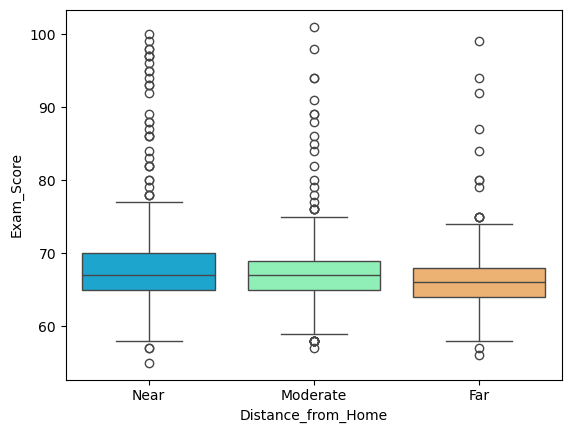

In [28]:
sns.boxplot(x=df1['Distance_from_Home'],y=df1['Exam_Score'], palette='rainbow')

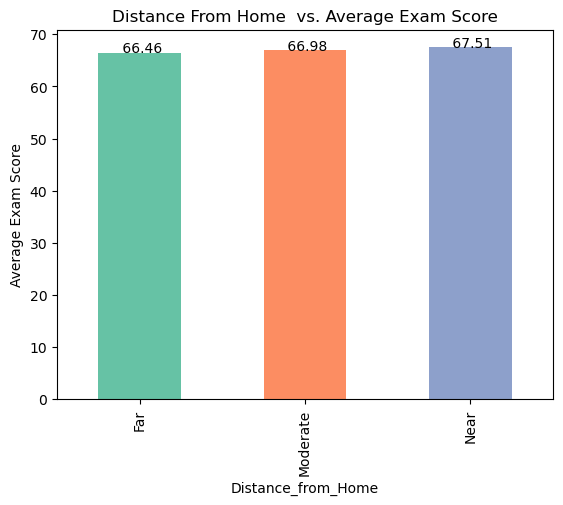

In [30]:
plt.title('Distance From Home  vs. Average Exam Score') 
plt.xlabel('Distance from Home')
plt.ylabel('Average Exam Score')
ax=df1['Exam_Score'].groupby(df1['Distance_from_Home']).mean()
ax.plot(kind='bar', color=sns.color_palette('Set2'))

for index, value in enumerate(ax):
    label = f'{value: .2f}' 
    plt.text(index, value,label,ha='center')

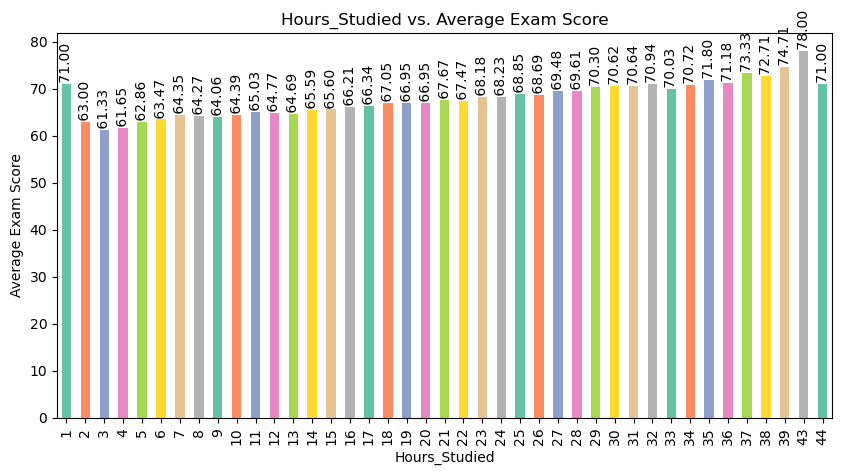

In [32]:
plt.figure(figsize=(10,5))
plt.title('Hours_Studied vs. Average Exam Score') 
plt.xlabel('Hours_Studied')
plt.ylabel('Average Exam Score')
ax=df1['Exam_Score'].groupby(df1['Hours_Studied']).mean()
ax.plot(kind='bar', color=sns.color_palette('Set2'))

for index, value in enumerate(ax):
    label = f'{value: .2f}' 
    plt.text(index, value,label,ha='center', rotation = 90)

In [42]:
df.loc[df['Exam_Score'] < 70, 'ExamCode'] = 0 
df.loc[df['Exam_Score'] >= 70, 'ExamCode'] = 1

X = df[['Attendance']]
Y = df['ExamCode']

from sklearn import tree
import matplotlib.pyplot as plt
import sklearn


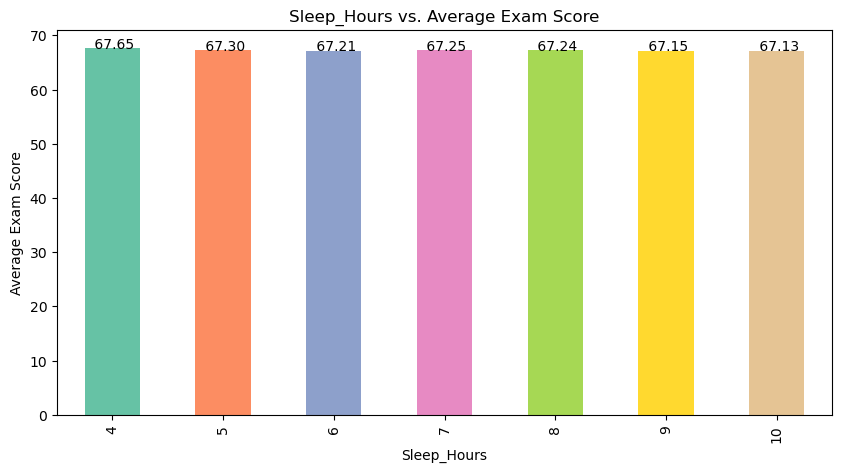

In [44]:
plt.figure(figsize=(10,5))
plt.title('Sleep_Hours vs. Average Exam Score') 
plt.xlabel('Sleep Hours')
plt.ylabel('Average Exam Score')
ax=df1['Exam_Score'].groupby(df1['Sleep_Hours']).mean()
ax.plot(kind='bar', color=sns.color_palette('Set2'))

for index, value in enumerate(ax):
    label = f'{value: .2f}' 
    plt.text(index, value,label,ha='center')

[Text(0.5, 0.8333333333333334, 'Hours_Studied <= 22.5\ngini = 0.371\nsamples = 6607\nvalue = [4982, 1625]'),
 Text(0.25, 0.5, 'Hours_Studied <= 17.5\ngini = 0.251\nsamples = 4377\nvalue = [3732, 645]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.152\nsamples = 2237\nvalue = [2052, 185]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.337\nsamples = 2140\nvalue = [1680, 460]'),
 Text(0.75, 0.5, 'Hours_Studied <= 26.5\ngini = 0.493\nsamples = 2230\nvalue = [1250, 980]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.455\nsamples = 1320\nvalue = [858.0, 462.0]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.49\nsamples = 910\nvalue = [392, 518]')]

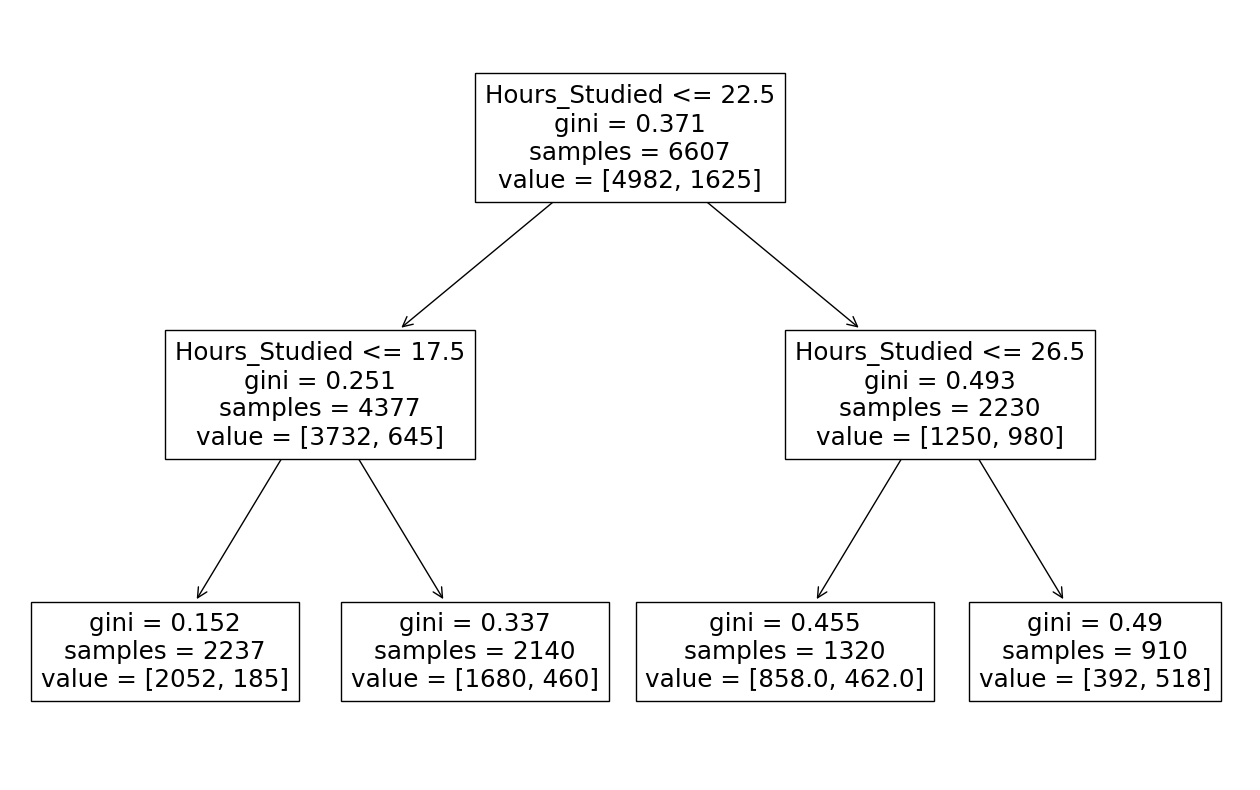

In [46]:
df.loc[df['Distance_from_Home'] == 'Far', 'DistanceCode'] = 0 
df.loc[df['Distance_from_Home'] == 'Moderate', 'DistanceCode'] = 1 
df.loc[df['Distance_from_Home'] == 'Near', 'DistanceCode'] = 2 


X = df[['Hours_Studied','DistanceCode']]
Y = df['ExamCode']

from sklearn import tree
import matplotlib.pyplot as plt
import sklearn
 
clf = tree.DecisionTreeClassifier(max_depth=2, random_state = 0)
clf = clf.fit(X,Y)

plt.figure(figsize=(16,10))
tree.plot_tree(clf,feature_names=['Hours_Studied','DistanceCode'])

In [50]:
accuracy = clf.score(X,Y) 
print("The decision tree is {:.2f}% accurate.".format(accuracy*100))

The decision tree is 77.31% accurate.


In [52]:
clf.feature_importances_

array([1., 0.])

Hour studied is important (100) while DistanceCode is not (0)